In [2]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached h5py-3.10.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/377.0 MB 14.5 MB/s eta 0:00:26
   ---------------------------------------- 1.4/377.0 MB 18.0 MB/s eta 0:00:21
   ---------------------------------------- 2.4/377.0 MB 19.5 MB/s eta 0:00:20
   ------------------------

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import seaborn as sns
import pandas as pd
from random import randrange
from sklearn import metrics

In [5]:
%conda install -c conda-forge nomkl

^C

Note: you may need to restart the kernel to use updated packages.


In [6]:
fashion = keras.datasets.fashion_mnist

In [8]:
(X_train, y_train), (X_test, y_test) = fashion.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
#Change the type of the value to float and divide them by 255 
#so they're between 0 and 1 (Normalisation)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [17]:
#Array Contenant des nombres qui correspondent à une classe d'article
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
class_names = [
    'T-shirt/top', 'Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [16]:
#Ici on a la classe d'article directement selon l'output d'y_train
class_names[y_train[1586]]

'Pullover'

'Sandal'

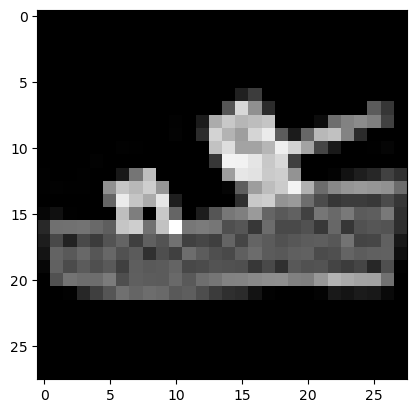

In [23]:
#Montre les images de la dataset
plt.imshow(X_train[12], cmap='gray')
#Donne la classe
class_name[y_train[12]]

In [24]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
#Number of nodes : 300, and connection between nodes : Dense
model.add(keras.layers.Dense(300, activation="relu"))
#Number of nodes : 100, and connection between nodes : Dense
model.add(keras.layers.Dense(100, activation="relu"))
#In the ouput we need 10 nodes, they corresponds to the number of classes we got
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\carlf\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
#Parameters : Every 784 nodes of the flatten_1 was connected to the 300 of dense 2 so it give you 235200 param
#Les 300 autres sont les constants
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 799,832 (3.05 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 533,222 (2.03 MB)

In [34]:
h1 = model.layers[1]

In [48]:
weights, biases = h1.get_weights()

In [50]:
weights

array([[-0.05924142, -0.00473311,  0.0689464 , ...,  0.05997712,
         0.0507118 , -0.10976866],
       [-0.02268097,  0.04426079, -0.14492375, ..., -0.04763068,
        -0.1836676 ,  0.29293653],
       [-0.05273993, -0.19420879, -0.26492646, ..., -0.19508168,
        -0.22249553,  0.15372497],
       ...,
       [-0.00908055, -0.1315047 , -0.17714764, ..., -0.24527362,
        -0.12212919, -0.16236642],
       [-0.04566821, -0.0948898 , -0.1030429 , ..., -0.11190866,
        -0.24109206, -0.08366559],
       [-0.02029557, -0.00847402, -0.17422923, ..., -0.3308634 ,
        -0.10068499,  0.06546097]], dtype=float32)

In [42]:
#Compilation du modèle

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [43]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1243 - loss: 2.3000
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1684 - loss: 2.2986
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1583 - loss: 2.2972
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1801 - loss: 2.2957
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2026 - loss: 2.2934
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2418 - loss: 2.2908
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2681 - loss: 2.2870
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2407 - loss: 2.2817
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3412 - loss: 2.2736
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3058 - loss: 2.2613
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3106 - loss: 2.2401
Epoch 12/30
1875/1875 ━━━━━━━━

In [45]:
#L'optimizer Adam est meilleur 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8091 - loss: 0.5272
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8338 - loss: 0.4595
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8482 - loss: 0.4252
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8549 - loss: 0.3957
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8652 - loss: 0.3715


In [46]:
#85% c'est pas mal 
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8595 - loss: 0.3999


[0.40623483061790466, 0.8529000282287598]

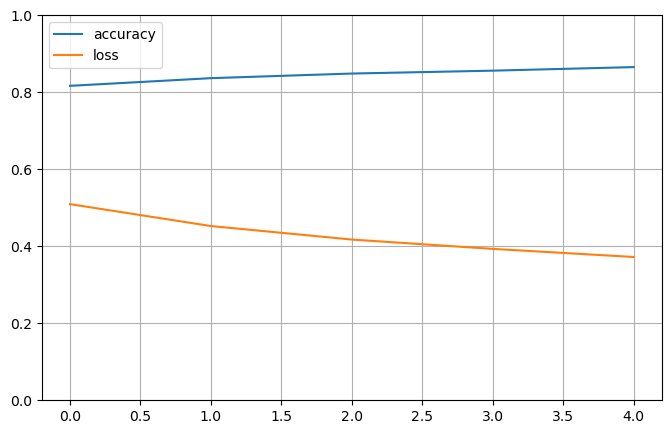

In [47]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [51]:
predict_y = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [53]:
predict_y.round(3)

array([[0.   , 0.   , 0.   , ..., 0.031, 0.006, 0.936],
       [0.001, 0.   , 0.939, ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.001, 0.   , 0.   , ..., 0.   , 0.99 , 0.   ],
       [0.   , 0.998, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.001, ..., 0.014, 0.059, 0.001]], dtype=float32)

In [55]:
predict_class = np.argmax(predict_y, axis=1)
predict_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [57]:
np.array(class_name)[predict_class]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

The prediction for this item is a Trouser


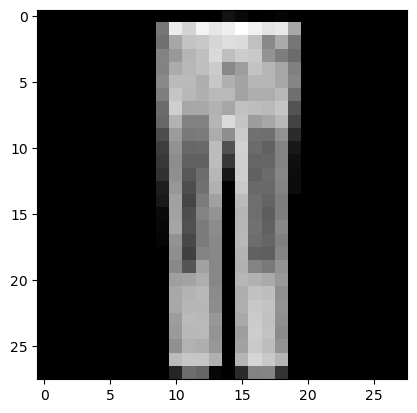

In [60]:
#Montre l'image accompagné de la prédiction de la classe du produit du produit
plt.imshow(X_test[15], cmap='gray')
print("The prediction for this item is a " +str(class_name[predict_class[15]]))

The prediction for this item is a Sneaker


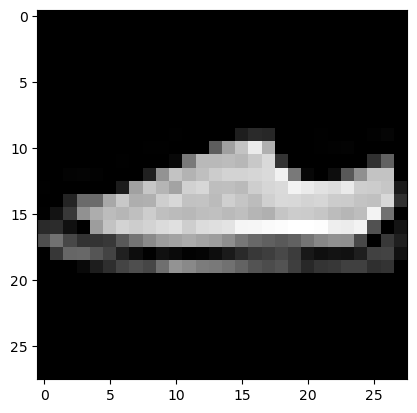

In [63]:
#Un exemple différent chaque fois qu'on lance 
item = randrange(1000)
plt.imshow(X_test[item], cmap='gray')
print("The prediction for this item is a " +str(class_name[predict_class[item]]))

In [66]:
conf_matr = metrics.confusion_matrix(y_test, predict_class)

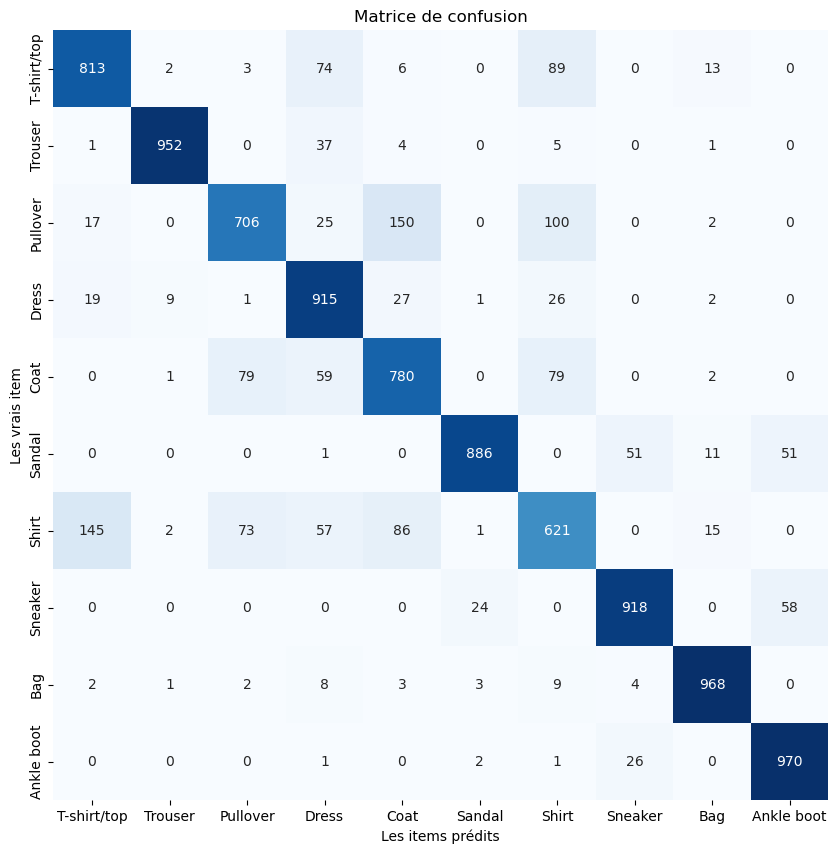

In [76]:
plt.figure(figsize = (10,10))
sns.heatmap(conf_matr, annot=True, fmt='d', cmap="Blues", cbar = False)
plt.title("Matrice de confusion")
plt.ylabel("Les vrais item")
plt.xlabel("Les items prédits")
plt.yticks(np.arange(10) + 0.5,[
    'T-shirt/top', 'Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'])
plt.xticks(np.arange(10) + 0.5,[
    'T-shirt/top', 'Trouser','Pullover','Dress','Coat',
    'Sandal','Shirt','Sneaker','Bag','Ankle boot'])
plt.show()